In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ROOT=r'C:\git\convertible_bond\data'

In [4]:
filename = '2021-07-06_daily_netvalu.xlsx'
df = pd.read_excel(os.path.join(ROOT,filename))

In [28]:
filename2 = '2021-07-06_daily_netvalu2.xlsx'
df2 = pd.read_excel(os.path.join(ROOT,filename2))

In [59]:
df2.head()

,Unnamed: 0,当前市值,收益率,日期,最大回撤
0,0,1000000.00,0.00,20180102,0.0
1,1,1013192.31,1.32,20180103,0.0
2,2,1019569.53,1.96,20180104,0.0
3,3,1026951.33,2.70,20180105,0.0
4,4,1023891.87,2.39,20180108,0.3


In [20]:
df2['日期']=pd.to_datetime(df2['日期'],format='%Y%m%d')
df2.set_index('日期',drop=True,inplace=True)

In [6]:
df['日期']=pd.to_datetime(df['日期'],format='%Y%m%d')
df.set_index('日期',drop=True,inplace=True)

C:\anaconda\lib\site-packages\matplotlib\textpath.py:84: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\anaconda\lib\site-packages\matplotlib\textpath.py:84: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0, flags=flags)


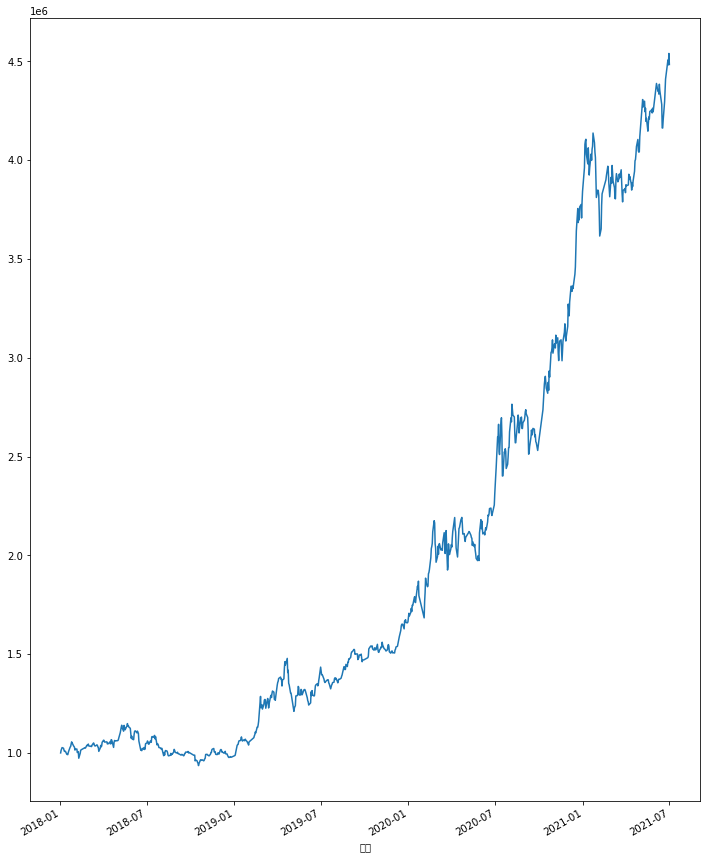

In [22]:
plt.figure(figsize=(12,16))
df['当前市值'].plot()
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 849 entries, 20180102 to 20210701
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  849 non-null    int64  
 1   当前市值        849 non-null    float64
 2   收益率         849 non-null    float64
 3   最大回撤        849 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 73.2 KB


In [7]:
import pyecharts.options as opts
from pyecharts.charts import Line
from pyecharts.faker import Faker
from pyecharts.commons.utils import JsCode
from datetime import  datetime

In [8]:
background_color_js = (
    "new echarts.graphic.LinearGradient(0, 0, 0, 1, "
    "[{offset: 0, color: '#c86589'}, {offset: 1, color: '#06a7ff'}], false)"
)
area_color_js = (
    "new echarts.graphic.LinearGradient(0, 0, 0, 1, "
    "[{offset: 0, color: '#eb64fb'}, {offset: 1, color: '#3fbbff0d'}], false)"
)

In [91]:
name = datetime.now().strftime('%Y%m%d')
X=df.index.tolist()
X=list(map(convert_time,X))
Y=df['收益率'].tolist()
Y2=df2['收益率'].tolist()

c = (
    Line(init_opts=opts.InitOpts(bg_color=JsCode(background_color_js)))
    .add_xaxis(X)
    .add_yaxis("只取未到转股期可转债收益率%", Y, is_smooth=True,
    areastyle_opts=opts.AreaStyleOpts(color=JsCode(area_color_js), opacity=1),linestyle_opts=opts.LineStyleOpts(width=1,color='rgb(0, 255, 0)'),label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis("所有可转债收益率%", Y2, is_smooth=True,
    areastyle_opts=opts.AreaStyleOpts(color=JsCode(area_color_js), opacity=1),linestyle_opts=opts.LineStyleOpts(width=1,color='rgb(255, 0, 0)'),label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="折价策略收益率%"),
        xaxis_opts=opts.AxisOpts(
                                name='日期',
                                min_interval=5,
                                splitline_opts=opts.SplitLineOpts(is_show=True)
                                ),
        yaxis_opts=opts.AxisOpts(
                                interval=50,min_=-50,max_=600,
            splitline_opts=opts.SplitLineOpts(is_show=True),
        )
                                    ).set_colors(['green','red'])
    .render(f"plot_line_{name}.html")
)
c.render_notebook()

In [10]:
def convert_time(x):
    return str(x).replace(' 00:00:00','')

In [26]:
str(X[0])

'2018-01-02 00:00:00'

In [86]:
Y[-1]

348.4

In [87]:
Y2[-1]

455.66

In [18]:
name = datetime.now().strftime('%Y%m%d')
X=df.index.tolist()
X=list(map(convert_time,X))
Y=df['收益率'].tolist()
title="折价收益率%"
c = (
    Line(init_opts=opts.InitOpts(bg_color=JsCode(background_color_js)))
    .add_xaxis(X)
    .add_yaxis(title, Y, is_smooth=True,
    areastyle_opts=opts.AreaStyleOpts(color=JsCode(area_color_js), opacity=1),linestyle_opts=opts.LineStyleOpts(width=1,color='rgb(255, 255, 102)'),label_opts=opts.LabelOpts(is_show=True),
    ).set_global_opts(
        title_opts=opts.TitleOpts(title=title),
        xaxis_opts=opts.AxisOpts(
                                name='日期',
                                min_interval=5,
                                splitline_opts=opts.SplitLineOpts(is_show=True)
                                ),
        yaxis_opts=opts.AxisOpts(
                                interval=50,min_=-50,max_=600,
            splitline_opts=opts.SplitLineOpts(is_show=True),
        )
                                    ).set_colors(['yellow'])
    .render(f"plot_line_{name}.html")
)
# c.render_notebook()

In [32]:
name = datetime.now().strftime('%Y%m%d')
X=df.index.tolist()
X=list(map(convert_time,X))
Y=df['收益率'].tolist()
Y2= df2['收益率'].tolist()
title="折价收益率%"
title2='持有5个转债'
title1='持有10个转债'
c = (
    Line(init_opts=opts.InitOpts(bg_color=JsCode(background_color_js)))
    .add_xaxis(X)
    .add_yaxis(title2, Y2, is_smooth=True,
    areastyle_opts=opts.AreaStyleOpts(color=JsCode(area_color_js), opacity=1),linestyle_opts=opts.LineStyleOpts(width=1,color='rgb(255, 255, 102)'),label_opts=opts.LabelOpts(is_show=True),
    ).add_yaxis(title1, Y, is_smooth=True,
    areastyle_opts=opts.AreaStyleOpts(color=JsCode(area_color_js), opacity=1),linestyle_opts=opts.LineStyleOpts(width=1,color='rgb(255, 0, 0)'),label_opts=opts.LabelOpts(is_show=True),
    ).set_global_opts(
        title_opts=opts.TitleOpts(title=title),
        xaxis_opts=opts.AxisOpts(
                                name='日期',
                                min_interval=5,
                                splitline_opts=opts.SplitLineOpts(is_show=True)
                                ),
        yaxis_opts=opts.AxisOpts(
                                interval=50,min_=-50,max_=1000,
            splitline_opts=opts.SplitLineOpts(is_show=True),
        )
                                    ).set_colors(['yellow','red'])
    .render(f"plot_line_{name}.html")
)